In [1]:
import os

import numpy as np


import matplotlib.pyplot as plt
from matplotlib.image import imread

import scipy as sp

import imageio
import io

# Exercise 2-1. 

Load the image dog.jpg and convert to grayscale. Use the FFT to compress the image at different compression ratios. Plot the error between the compressed and actual image as a function of the compression ratio.

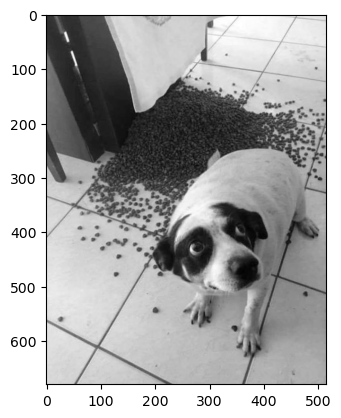

In [2]:
A = imread(os.path.join('..','DATA','caught_dog.png'))
B = np.mean(A, -1); # Convert RGB to grayscale
img = plt.imshow(B)
img.set_cmap('gray')

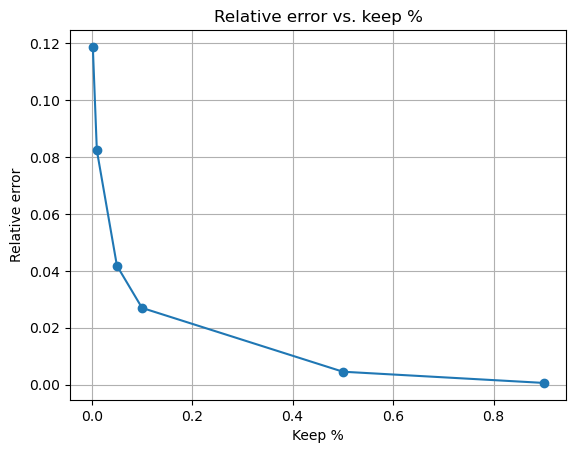

In [3]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

errors = []

keep = [0.9, 0.5, 0.1, 0.05, 0.01, 0.002]


for i in keep:
    thresh = Btsort[int(np.floor((1-i)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    errors.append(np.linalg.norm(B-Alow)/np.linalg.norm(B))

plt.plot(keep, errors, 'o-')
plt.xlabel('Keep %')
plt.ylabel('Relative error')
plt.title('Relative error vs. keep %')
plt.grid()
plt.show()

# Exercise 2-2

Consider the following triangular wave:

$$
f(x) = \begin{cases}
0 & x < -1 \\
1 - |x| & |x| \leq 1 \\
0 & 1 < x
\end{cases}
$$

Compute the Fourier series by hand for the domain −2 ≤ x < 2. Plot the mode coefficients $a_n$ and $b_n$ for the first 100 cosine and sine modes (i.e., for the first n = 1 to n = 100). Also, plot the approximation using n = 10 modes on top of the true triangle wave.
In a few sentences, explain the difference between the Fourier transform and the Fourier series.


To compute the Fourier series for the given triangular wave, we need to determine the coefficients for the cosine and sine modes. The Fourier series representation of a periodic function f(x) with period 2L is given by:
$
f(x) = a_0/2 + \sum_n(a_n cos(n\pi x/L) + b_n sin(n\pi x/L))
$

where $a_0$, $a_n$, and $b_n$ are the Fourier coefficients, and $n$ is the mode number. In this case, we have a triangular wave with period 2, so L = 1.

To compute the Fourier coefficients, we can use the following formulas:

$$
\begin{align}

a_0 &= \frac{1}{L} \int_{-L}^{L} f(x) dx \\
a_n &= \frac{1}{L} \int_{-L}^{L} f(x) cos(n\pi x/L) dx \\
b_n &= \frac{1}{L} \int_{-L}^{L} f(x) sin(n\pi x/L) dx \\
\end{align}
$$

In this case, L = 1, and the integral limits are from -1 to 1. Let's compute the coefficients for the first 100 cosine and sine modes.

$a_0$:

$$
\begin{align}
a_0 &= \frac{1}{1} \int_{-1}^{1} f(x) dx \\
&= \int_{-1}^{1} (1 - |x|) dx \\
&= 2\int_{0}^{1} (1 - x) dx \\
&= 2\left[x - \frac{x^2}{2}\right] \quad \text{evaluated from 0 to 1} \\
&= 2(1 - \frac{1}{2} - 0 + 0) \\
&= 1 \\
\end{align}
$$



$a_n$:

$$
\begin{align}
a_n &= \frac{1}{1} \int_{-1}^{1} f(x) cos(n\pi x) dx \\
&= \int_{-1}^{1} (1 - |x|) cos(n\pi x) dx \\
\end{align}
$$


To compute this integral, we need notice that the function is even:

$$
\begin{align}
\int_{-1}^{1} (1 - |x|) cos(n\pi x) dx & = 2 \int_{0}^{1} -(x-1) cos(n\pi x) dx \\
&= -2 \int_{0}^{1} (x-1) cos(n\pi x) dx \\
&= -2 \int_{0}^{1} (x cos(n\pi x) - cos(n\pi x)) dx \\
&= 2 \left[\frac{1-cos(n\pi)}{n^2\pi^2}- \frac{sin(n\pi x)}{n\pi} + \int_{0}^{1} cos(n\pi x) dx \right]\\
&= 2 \left[\frac{1-cos(n\pi)}{n^2\pi^2}- \frac{sin(n\pi x)}{n\pi} + \frac{sin(n\pi)}{n\pi} \right] \\
&= \frac{2-2cos(n\pi)}{n^2\pi^2}
\end{align}
$$


bn:

$$
\begin{align}
b_n &= \frac{1}{1} \int_{-1}^{1} f(x) sin(n\pi x) dx \\
&= \int_{-1}^{1} (1 - |x|) sin(n\pi x) dx \\
\end{align}
$$


To compute this integral, we need notice that the function is odd and hence 0:


Therefore, $b_n=0$

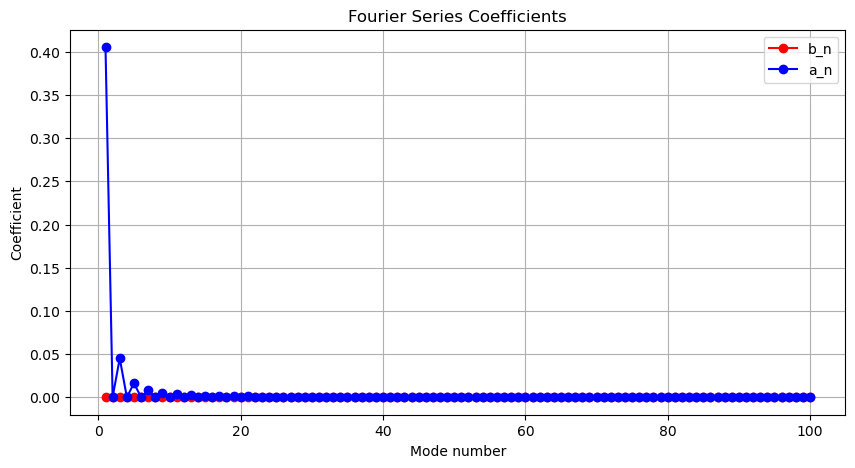

In [4]:
n = np.arange(1, 101)  # Mode numbers from 1 to 100

def an(n):
    pi_n = n * np.pi
    return (2-2*np.cos(pi_n))/(pi_n**2)

bn = 0

plt.figure(figsize=(10, 5))
plt.plot(n, [bn]*len(n), 'o-', color = 'r', label=r'b_n')
plt.plot(n, an(n), 'o-', color = 'b', label=r'a_n')
plt.xlabel('Mode number')
plt.ylabel('Coefficient')
plt.title('Fourier Series Coefficients')
plt.legend()
plt.grid(True)
plt.show()


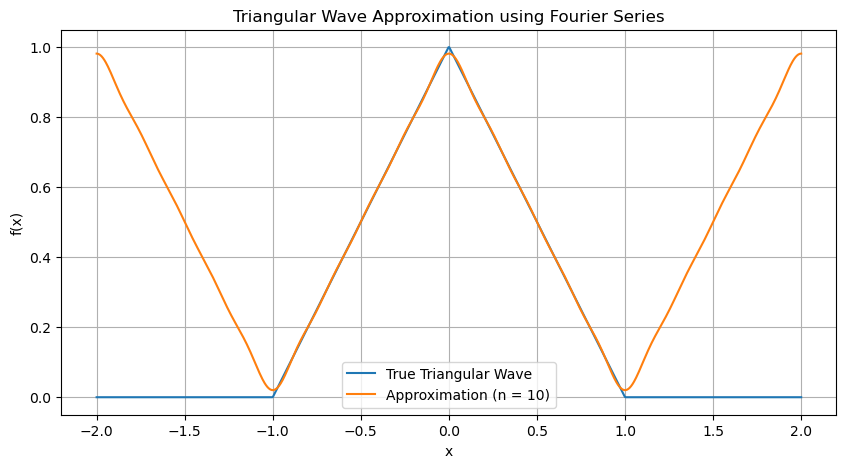

In [5]:
def an(n):
    pi_n = n * np.pi
    return (2-2*np.cos(pi_n))/(pi_n**2)


def fourier_series_approximation(num_terms, t):
    approximation = 1 / 2  
    
    for k in range(1, num_terms + 1):
        approximation += an(k) * np.cos((2 * np.pi * k * t)/2)
    
    return approximation

x = np.linspace(-2, 2, 1000)
approximation = fourier_series_approximation(10, x)

y_true = np.piecewise(x, [x < -1, np.logical_and(-1 <= x, x <= 1), 1 < x], [0, lambda x: 1 - np.abs(x), 0])


plt.figure(figsize=(10, 5))
plt.plot(x, y_true, label='True Triangular Wave')
plt.plot(x, approximation, label='Approximation (n = 10)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Triangular Wave Approximation using Fourier Series')
plt.legend()
plt.grid(True)
plt.show()


The Fourier series deals with periodic functions and decomposes them into a sum of sinusoidal components, while the Fourier transform operates on non-periodic functions, transforming them into the frequency domain to analyze their spectral content.

# Exercise 2-3

Use the FFT to solve the Korteweg–de Vries (KdV) equation,

$$
\frac{\partial u}{\partial t} + \frac{\partial^3 u}{\partial x^3} - u \frac{\partial u}{\partial x} = 0
$$

on a large domain with an initial condition $u(x, 0) = sech(x)$. Plot the evolution.

In [6]:
L = 20     # Length of domain
N = 1000   # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = 1/np.cosh(x)

# Simulate PDE in spatial domain
dt = 0.025
t = np.arange(0,100*dt,dt)

In [7]:
def KdVs(u,t,kappa):
    uhat = np.fft.fft(u)

    d_uhat = (1j)*kappa*uhat
    ddd_uhat = np.power((1j)*kappa,3) * uhat

    d_u = np.fft.ifft(d_uhat)
    ddd_u = np.fft.ifft(ddd_uhat)
    
    du_dt = u * d_u - ddd_u
    return du_dt.real

c:\Users\Robin\anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


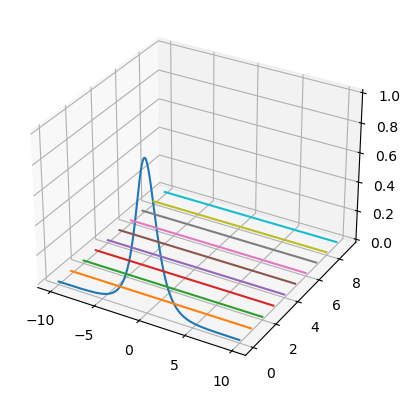

In [8]:
u = sp.integrate.odeint(KdVs,u0,t,args=(kappa,))

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])

## Something wrong here

# Exercise 2-4

Use the FFT to solve the Kuramoto–Sivashinsky (KS) equation

$$
\frac{\partial u}{\partial t} + \frac{\partial^2 u}{\partial x^2} + \frac{\partial^4 u}{\partial x^4} + \frac{1}{2}\frac{\partial u^2}{\partial x} = 0
$$

on a large domain with an initial condition $u(x, 0) = sech(x)$. Plot the evolution.

In [9]:
def KS(u,t,kappa):
    uhat = np.fft.fft(u)

    d_uhat = (1j)*kappa*uhat
    dd_uhat = np.power((1j)*kappa,2) * uhat
    dddd_uhat = np.power((1j)*kappa,4) * uhat

    d_u = np.fft.ifft(d_uhat)
    dd_u = np.fft.ifft(dd_uhat)
    dddd_u = np.fft.ifft(dddd_uhat)
    
    du_dt = -dd_u - dddd_u - 1/2*d_u**2
    return du_dt.real

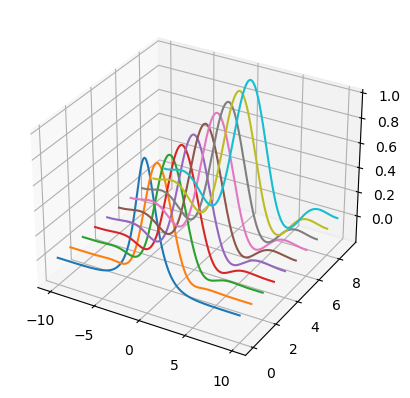

In [10]:
u = sp.integrate.odeint(KS,u0,t,args=(kappa,))

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])

# Exercise 2-5
Solve for the analytic equilibrium temperature distribution using the 2D Laplace equation on an L × H sized rectangular domain with the following boundary conditions.

(a) Left: $u_x(0,y) = 0$,
(b) Bottom: $u(x,0) = 0$
(c) Top: $u_y(x,H) = 0$, 
(d) Right: $u_x(L,y) = 0$

Solve for a general boundary temperature $f(x)$. Also solve for a particular temperature distribution f(x); you may choose any non-constant distribution you like.
How would this change if the left and right boundaries were fixed at zero temperature? (You do not have to solve this new problem, just explain in words
what would change.)


https://math.libretexts.org/Bookshelves/Differential_Equations/Introduction_to_Partial_Differential_Equations_(Herman)/02%3A_Second_Order_Partial_Differential_Equations/2.05%3A_Laplaces_Equation_in_2D

# Exercise 2-6
Now, compute the solution to the 2D heat equation on a circular
disk through simulation. Recall that the heat equation is given by

$$
\frac{\partial u}{\partial t} = \alpha^2 \nabla^2 u
$$

For this problem, we will solve the heat equation using a finite-difference scheme
on a Cartesian grid. We will use a grid of 300 × 300 with the circular disk in the
center. The radius of the circle is r = 1, $\alpha$ = 1, and the domain is [−1.5, 1.5] in $x$
and [−1.5, 1.5] in $y$. You can impose the boundary conditions by enforcing the
temperature at points that are outside of the disk at the beginning of each new
time-step. It should be easy to find points that are outside the disk, because
they satisfy $x^2 + y^2 > 1$
Simulate the unsteady heat equation for the following boundary conditions:

(a) The left half of the boundary of the disk is fixed at a temperature of $u = 1$
and the right half of the boundary is fixed at $u = 2$. Try simulating this
with zero initial conditions first. Next, try initial conditions inside the disk
where the top half is $u = −1$ and the bottom half is $u = 1$.

(b) The temperature at the boundary of the disk is fixed at $u(\theta) = \cos(\theta)$

Include your code and show some plots of your solutions to the heat equation.
Plot the temperature distribution for each case (1) early on in the diffusion process, (2) near steady state, and (3) somewhere in the middle.

In [11]:
# Define grid parameters
N = 100
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
dx = (x_max - x_min) / (N - 1)
dy = (y_max - y_min) / (N - 1)
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(x, y)

# Define circle parameters
r = 1
xc, yc = 0, 0
circle = (X - xc)**2 + (Y - yc)**2 <= r**2

t_max = 0.1
dt = 0.0001
t = 0

# Define initial temperature distribution
T = np.zeros((N, N))

In [12]:
def heat_equation(T, dt, dx, dy, circle_mask=circle):
    T_new = np.copy(T)
    delta_x_sq = dx**2
    delta_y_sq = dy**2
    
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            if circle_mask[i, j]:
                laplacian = (T[i + 1, j] - 2 * T[i, j] + T[i - 1, j]) / delta_x_sq + (T[i, j + 1] - 2 * T[i, j] + T[i, j - 1]) / delta_y_sq
                T_new[i, j] = T[i, j] + dt * laplacian

    return T_new

In [13]:
def make_gif(matrix, name):

    global x_min, x_max, y_min, y_max

    heatmaps = []

    for i in matrix:

        plt.imshow(i , cmap='jet', origin='lower', extent=[x_min, x_max, y_min, y_max])
       
        # Save the plot as an image buffer
        buffer = io.BytesIO()
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        
        # Append the buffer to the list of heatmaps
        heatmaps.append(imageio.imread(buffer))
        
        # Clear the plot for the next iteration
        plt.clf()

    # Save the heatmaps as a GIF
    imageio.mimsave(name+'.gif', heatmaps, duration=0.1)

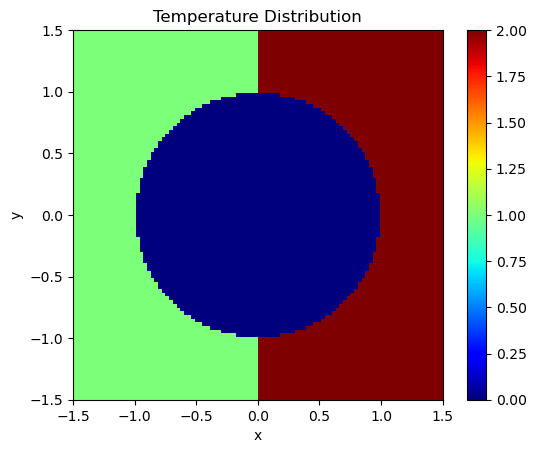

In [14]:
# left and right case

T_a_1 = np.copy(T)

T_a_1[:, :N//2] = 1  # left half
T_a_1[:, N//2:] = 2  # right half
T_a_1[circle] = 0  # circle zero

plt.imshow(T_a_1 , cmap='jet', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Temperature Distribution')
plt.show()

In [16]:
time_slices = [T_a_1]

t_a_1 = 0

# Define the loop
while t_a_1 <= t_max:
    P = heat_equation(time_slices[-1], dt, dx, dy)
    time_slices.append(P)
    t_a_1 += dt

# Reduce the number of snapshots animated
slim_time_slices = []
for index, element in enumerate(time_slices):
    if (index + 1) % 10 == 0:
        slim_time_slices.append(element)

In [17]:
make_gif(slim_time_slices, 'left_right')

C:\Users\Robin\AppData\Local\Temp\ipykernel_10172\2545290342.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  heatmaps.append(imageio.imread(buffer))


<Figure size 640x480 with 0 Axes>

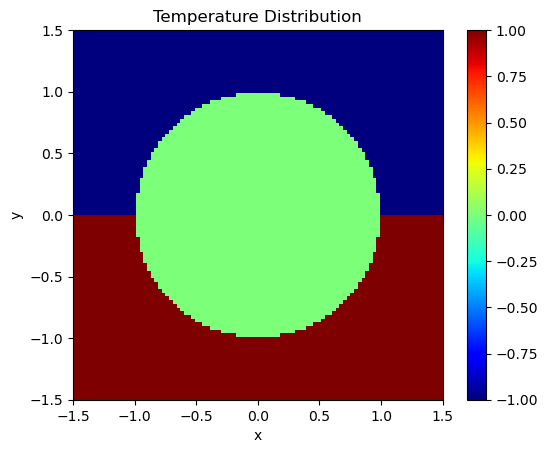

In [19]:
# top bottom case
T_a_2 = np.copy(T)

T_a_2[:N//2, :] = 1  # top half
T_a_2[N//2:, :] = -1  # bottom half
T_a_2[circle] = 0  # circle zero

plt.imshow(T_a_2 , cmap='jet', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Temperature Distribution')
plt.show()

In [20]:
time_slices = [T_a_2]

t_a_2 = 0

# Define the loop
while t_a_2 <= t_max:
    P = heat_equation(time_slices[-1], dt, dx, dy)
    time_slices.append(P)
    t_a_2 += dt

# Reduce the number of snapshots animated
slim_time_slices = []
for index, element in enumerate(time_slices):
    if (index + 1) % 10 == 0:
        slim_time_slices.append(element)

In [21]:
make_gif(slim_time_slices, 'top_bottom')

C:\Users\Robin\AppData\Local\Temp\ipykernel_10172\2545290342.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  heatmaps.append(imageio.imread(buffer))


<Figure size 640x480 with 0 Axes>

## For some reason it does not solve the cosine boundary condition

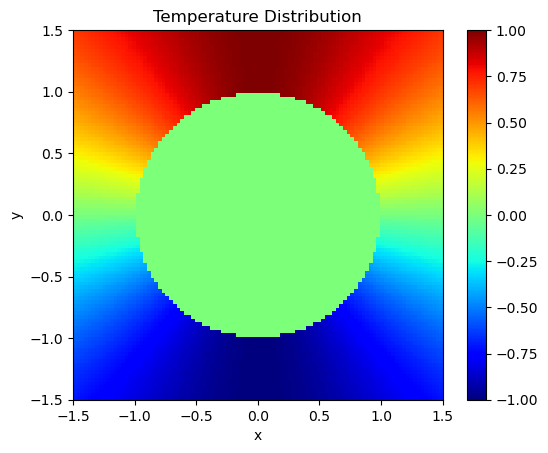

In [22]:
T_b = np.copy(T)

# Cosine case
# Calculate the center of the grid
center_x = N / 2
center_y = N / 2

# Calculate the theta for each point in the grid with respect to the center
for i in range(N):
    for j in range(N):
        # Calculate the x and y distances from the center
        dx = i - center_x
        dy = j - center_y
        
        # Calculate the angle theta (in radians)
        theta = np.arctan2(dy, dx)
        
        # Calculate the cosine of theta and assign it to T
        T_b[i, j] = np.cos(theta)

T_b[circle] = 0  # circle zero

plt.imshow(T_b , cmap='jet', origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Temperature Distribution')
plt.show()

In [23]:
time_slices = [T_b]
t_b = 0

# Define the loop
while t_b<= t_max:
    P = heat_equation(time_slices[-1], dt, dx, dy)
    time_slices.append(P)
    t_b += dt

# Reduce the number of snapshots animated
slim_time_slices = []
for index, element in enumerate(time_slices):
    if (index + 1) % 10 == 0:
        slim_time_slices.append(element)

In [24]:
make_gif(slim_time_slices, 'cosine')

C:\Users\Robin\AppData\Local\Temp\ipykernel_10172\2545290342.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  heatmaps.append(imageio.imread(buffer))


<Figure size 640x480 with 0 Axes>

# Exercise 2-7
Consider the PDE for a vibrating string of finite length L,

$$
\begin{align}
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}, \quad 0 \leq x \leq L, \quad t > 0
\end{align}
$$

with the initial conditions

$$
\begin{align}
u(x, 0) = 0 \\
u_t(x, 0) = 0
\end{align}
$$

and the boundary conditions

$$
\begin{align}
u(0, t) = 0 \\
u(L, t) = f(t)
\end{align}
$$

Solve this PDE by using the Laplace transform. You may keep your solution in the frequency domain, since the inverse transform is complicated. Please simplify as much as possible using functions like sinh and cosh.

$$
\begin{align}
\mathcal{L}\left(\frac{\partial^2 u}{\partial t^2}\right) &= \mathcal{L}\left(c^2 \frac{\partial^2 u}{\partial x^2}\right) \\
s^2 U(x, s) - s u(x, 0) - u_t(x, 0) &= c^2 \frac{\partial^2 U(x, s)}{\partial x^2} \\
s^2 U(x, s) &= c^2 \frac{\partial^2 U(x, s)}{\partial x^2} \\
\frac{\partial^2 U(x, s)}{\partial x^2} - \frac{s^2}{c^2} U(x, s) &= 0 \\
&\Rightarrow U(x, s) = \bar{A}(s)e^{-\frac{s}{c}x} + \bar{B}(s)e^{+\frac{s}{c}x}
\end{align}
$$

Laplace transform of the boundary conditions:

$$
\begin{align}
\mathcal{L}\left(u(0, t)\right) &= \mathcal{L}\left(0\right) \\
U(0, s) &= 0 \\
\mathcal{L}\left(u(L, t)\right) &= \mathcal{L}\left(f(t)\right) \\
U(L, s) &= F(s)
\end{align}
$$

Applying the boundary conditions to the solution:

$$
\begin{align}
U(0, s) &= \bar{A}(s) + \bar{B}(s) = 0 \\
U(L, s) &= \bar{A}(s)e^{-\frac{s}{c}L} + \bar{B}(s)e^{+\frac{s}{c}L} = F(s) \\
&\Rightarrow \bar{A}(s) = -\bar{B}(s) \\
&\Rightarrow \bar{B}(s) = \frac{F(s)}{e^{\frac{s}{c}L} + e^{-\frac{s}{c}L}} \\
&\Rightarrow \bar{A}(s) = -\frac{F(s)}{e^{\frac{s}{c}L} + e^{-\frac{s}{c}L}} \\
&\Rightarrow \bar{A}(s) = -\frac{F(s)}{2*\sinh(Ls/c)} \\
&\Rightarrow \bar{B}(s) = \frac{F(s)}{2*\sinh(Ls/c)} \\
&\Rightarrow U(x, s) = \frac{F(s)}{2\sinh(\frac{Ls}{c})}\left(e^{s\cdot x/c} + e^{-s\cdot x/c}\right) \\
&\Rightarrow U(x, s) = \frac{F(s)\sinh(\frac{s\cdot x}{c})}{\sinh(\frac{Ls}{c})} \\
&\Rightarrow u(x,t) = \mathcal{L}^{-1}\left(U(x, s)\right) \\
\end{align}
$$

# Exercise 2-8
Now, we will use the FFT to simultaneously compress and re-master an audio file. Please download the file r2112.mat and load the audio data into the matrix rush and the sample rate FS.

(a) Listen to the audio signal (>>sound(rush,FS);). Compute the FFT of this audio signal.

(b) Compute the power spectral density vector. Plot this to see what the output looks like. Also plot the spectrogram.

(c) Now, download r2112noisy.mat and load this file to initialize the variable rushnoisy. This signal is corrupted with high-frequency artifacts. Manually zero the last three-quarters of the Fourier components of this noisy signal (if n=length(rushnoisy), then zeroout all Fourier coefficients from n/4:n). Use this filtered frequency spectrum to reconstruct the clean audio signal. When reconstructing, be sure to take the real part of the inverse Fourier transform: cleansignal=real(ifft(filteredcoefs));.

Because we are only keeping the first quarter of the frequency data, you must multiply the reconstructed signal by 2 so that it has the correct normalized power. Be sure to use the sound command to listen to the preand post-filtered versions. Plot the power spectral density and spectrograms of the pre- and post-filtered signals.

# Exercise 2-9
The convolution integral and the impulse response may be used to simulate how an audio signal would sound under various conditions, such as in a long hallway, in a concert hall, or in a swimming pool.
The basic idea is that you can record the audio response to an impulsive sound in a given location, like a concert hall. For example, imagine that you put a microphone in the most expensive seats in the hall and then record the sound from a shotgun blast up on the stage. (Do not try this!!) Then, if you have a “flat” studio recording of some other audio, you can simulate how it would have sounded in the concert hall by convolving the two signals. Download and unzip sounds.zip to find various sounds and impulse-response filters. Convolve the various audio files (labeled sound1.wav, ...) with the various filters (labeled FilterXYZ.wav, ...). In MATLAB, use the wavread command to load and the conv command to convolve. It is best to add 10% of the filtered audio (also known as “wet” audio) to 90% of the original audio (also known as “dry” audio). Listen to the filtered audio, as well as the original audio and the impulse-response filters (note that each sound has a sampling rate of FS=11,025). However, you will need to be careful when adding the 10% filtered and 90% unfiltered signals, since the filtered audio will not necessarily have the same length as the filtered audio. There is a great video explaining how to actually create these impulse responses:
http://www.audioease.com/Pages/Altiverb/sampling.php

# Exercise 2-10
Verify the following properties of the Laplace transform

### a) Exponetial: $L\{e^{\lambda t}\} = \frac{1}{s-\lambda}$

$$
\begin{align}
L\{e^{\lambda t}\} &= \int_{0}^{\infty} e^{-st} e^{\lambda t} dt \\
&= \int_{0}^{\infty} e^{-(s-\lambda)t} dt \\
&= \frac{1}{s-\lambda} \left[-e^{-(s-\lambda)t}\right]_{0}^{\infty} \\
&= \frac{1}{s-\lambda} \left[0 - (-1)\right] \\
&= \frac{1}{s-\lambda}
\end{align}
$$


### b) Linearity: $L\{af(t) + bg(t)\} = aL\{f(t)\} + bL\{g(t)\}$

$$
\begin{align}
L\{af(t) + bg(t)\} &= \int_{0}^{\infty} e^{-st} (af(t) + bg(t)) dt \\
&= \int_{0}^{\infty} e^{-st} af(t) dt + \int_{0}^{\infty} e^{-st} bg(t) dt \\
&= a\int_{0}^{\infty} e^{-st} f(t) dt + b\int_{0}^{\infty} e^{-st} g(t) dt \\
&= aL\{f(t)\} + bL\{g(t)\}
\end{align}
$$

### c) Convolution: $L\{f(t) * g(t)\} = L\{f(t)\}L\{g(t)\}$

$$
\begin{align}
L\{f(t) * g(t)\} &= \int_{0}^{\infty} e^{-st} \int_{0}^{t} f(\tau) g(t-\tau) d\tau dt \\
&= \int_{0}^{\infty} \int_{0}^{t} e^{-st} f(\tau) g(t-\tau) d\tau dt \\
&= \int_{0}^{\infty}\left(\int_{0}^{t}  f(\tau) g(t-\tau) d\tau\right)e^{-st} dt \\
&= \int_{0}^{\infty}\left(\int_{0}^{\infty}  f(\tau) g(t-\tau) d\tau\right)e^{-st} dt \\
&= \int_{0}^{\infty} f(\tau) \left(\int_{0}^{\infty}  g(t-\tau) e^{-st} dt\right) d\tau \\
\end{align}
$$

let make the substitution $u = t - \tau$ and $du = dt$. The bounds of integration are from $-u$ to $\infty$. However since we want $g(\tau)$ to vanish for negative values of $\tau$, we can change the bounds of integration to $0$ to $\infty$.

$$
\begin{align}
L\{f(t) * g(t)\} &= \int_{0}^{\infty} f(\tau) \left(\int_{0}^{\infty}  g(u) e^{-s(u+\tau)} du\right) d\tau \\
&= \int_{0}^{\infty} f(\tau) \left(\int_{0}^{\infty}  g(u) e^{-su} e^{-s\tau} du\right) d\tau \\
&= \int_{0}^{\infty} f(\tau) e^{-s\tau} \left(\int_{0}^{\infty}  g(u) e^{-su} du\right) d\tau \\
&= \int_{0}^{\infty} f(\tau) e^{-s\tau} L\{g(t)\} d\tau \\
&= L\{f(t)\}L\{g(t)\}
\end{align}
$$


### d) Constant: $L\{1\} = \frac{1}{s}$

$$
\begin{align}
L\{1\} &= \int_{0}^{\infty} e^{-st} dt \\
&= \left[-\frac{e^{-st}}{s}\right]_{0}^{\infty} \\
&= \frac{1}{s} \left[0 - (-1)\right] \\
&= \frac{1}{s}
\end{align}
$$


### e) Delta function: $L\{\delta(t)\} = 1$

$$
\begin{align}
L\{\delta(t)\} &= \int_{0}^{\infty} e^{-st} \delta(t) dt \\
&= e^{-s\cdot 0}\\
&= 1
\end{align}
$$

# Exercise 2-11
Use the Laplace transform to solve for the general solution to the following differential equations:

$$
\begin{align}
x''+ax'+bx &= u(t)
\end{align}
$$

Taking the laplace transform of both sides:

$$
\begin{align}
L\{x''+ax'+bx\} &= L\{u(t)\} \\
L\{x''\} + aL\{x'\} + bL\{x\} &= L\{u(t)\} \\
s^2L\{x\} - sx(0) - x'(0) + asL\{x\} - ax(0) + bL\{x\} &= L\{u(t)\} \\
(s^2 + as + b)L\{x\} - sx(0) - x'(0) - ax(0) &= L\{u(t)\} \\
(s^2 + as + b)L\{x\} &= L\{u(t)\} + sx(0) + x'(0) + ax(0) \\
L\{x\} &= \frac{L\{u(t)\} + sx(0) + x'(0) + ax(0)}{s^2 + as + b} \\
\end{align}
$$

### What if $u(t)=0$?

$$
\begin{align}
L\{x\} &= \frac{L\{0\} + sx(0) + x'(0) + ax(0)}{s^2 + as + b} \\
&= \frac{sx(0) + x'(0) + ax(0)}{s^2 + as + b} \\
\end{align}
$$

### What if $u(t) = \delta(t)$?

$$
\begin{align}
L\{x\} &= \frac{L\{\delta(t)\} + sx(0) + x'(0) + ax(0)}{s^2 + as + b} \\
&= \frac{1 + sx(0) + x'(0) + ax(0)}{s^2 + as + b} \\
\end{align}
$$

### What if $u(t) = 1$?

$$
\begin{align}
L\{x\} &= \frac{L\{1\} + sx(0) + x'(0) + ax(0)}{s^2 + as + b} \\
&= \frac{\frac{1}{s} + sx(0) + x'(0) + ax(0)}{s^2 + as + b} \\
&= \frac{1 + s^2x(0) + sx'(0) + asx(0)}{s(s^2 + as + b)} \\
&= \frac{1 + s^2x(0) + sx'(0) + asx(0)}{s^3 + as^2 + bs} \\
\end{align}
$$
